> This is a rework of my task during Machine Learning class in 2022.

> Goal(s):
- to construct a model using the Gradient Descent based Linear Regression approach (scratch) to predict a house prices (a column named "MEDV" in the dataset) in a specific city in the US based on the given dataset.

> Requirement(s):
- the dataset should be cleaned of missing values and outliers.
- only independent variables that have a strong correlation with the dependent variable should be selected (use filtering techniques to select the appropriate independent variables).
- the implementation process should include feature engineering, model training and validation, and model evaluation.

> References **[A]**:
1.  https://www.scribbr.com/statistics/correlation-coefficient/
2.  https://www.statology.org/multicollinearity-regression/
3.  https://online.stat.psu.edu/stat462/node/180/
4.  https://statisticsbyjim.com/regression/interpret-r-squared-regression/
5.  https://www.simplypsychology.org/p-value.html
6.  https://www.statology.org/anova-f-value-p-value/
7.  https://www.statology.org/dummy-variable-trap/

> References **[B]**:
*  Class/University notes
*  https://medium.com/@pritioli/implementing-linear-regression-from-scratch-747343634494
*  https://marnec.github.io/ML/ML3/

# Import Essentials

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Dataset

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('../dataset/housing.csv', sep='\s+', names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
def split_dataset(x, y, size, state=np.random.randint(0, 100)):
  data_A_X, data_B_X, data_A_Y, data_B_Y = train_test_split(x, y, train_size = size, random_state = state)
  data_A = pd.concat([data_A_X, data_A_Y], axis=1)
  data_B = pd.concat([data_B_X, data_B_Y], axis=1)
  return data_A, data_B

In [4]:
data_train, data_test = split_dataset(data.drop(columns='MEDV'), data['MEDV'], 0.8, 21)

> Dividing the raw data into training and testing sets using a 4:1 ratio.

# Dataset Overview

In [5]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29,13.4
82,0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,4,281.0,19.0,396.90,6.72,24.8
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226.0,17.9,395.93,4.81,35.4
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22,17.2
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277.0,18.6,396.90,23.09,20.0


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 423 to 457
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 47.3 KB


> This training dataset consists of both independent (all numerical) and dependent variables of equal length with no null values. Therefore, there is no need to proceed to the Handling Missing Value step.

In [7]:
data_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.421434,10.384901,11.343267,0.079208,0.557264,6.278913,69.523020,3.727028,9.551980,408.688119,18.504703,356.631807,12.735718,22.587129
std,7.689681,22.030286,6.883233,0.270398,0.116343,0.716030,27.574443,2.063884,8.745067,169.386594,2.133335,89.629142,7.140371,9.064403
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000,5.000000
25%,0.082920,0.000000,5.190000,0.000000,0.453000,5.883000,47.075000,2.097050,4.000000,277.000000,17.400000,375.085000,7.092500,17.175000
50%,0.274475,0.000000,9.795000,0.000000,0.538000,6.208500,79.200000,3.107300,5.000000,335.000000,19.100000,391.295000,11.575000,21.200000
75%,3.674808,12.500000,18.100000,0.000000,0.624000,6.629250,94.300000,4.888875,24.000000,666.000000,20.200000,396.217500,16.790000,25.000000
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


# Exploratory Data Analysis (EDA)

In [8]:
def visualize_numvar(df, col_names, col_target, type):
  data = df[col_names]
  rows = np.ceil((len(data.columns)) / 2).astype(int)
  fig, axs = plt.subplots(rows, 2, figsize=(10, 10))
  axs = axs.flatten()
  for idx, col_name in enumerate(col_names):
    if(type == 'dist'):
      sns.histplot(data[col_name], ax=axs[idx], kde=True)
      axs[idx].set_title(f"Distribution Plot ({col_name})")
    elif (type == 'box'):
      sns.boxplot(x=df[col_target], ax=axs[idx])
      axs[idx].set_title(f"Box Plot ({col_name})")
    elif (type == 'scatter'):
      sns.scatterplot(x=df[col_target], y=data[col_name], ax=axs[idx])
      axs[idx].set_title(f"Scatter Plot ({col_name})")
  plt.tight_layout()
  plt.show()

## Distribution Plot

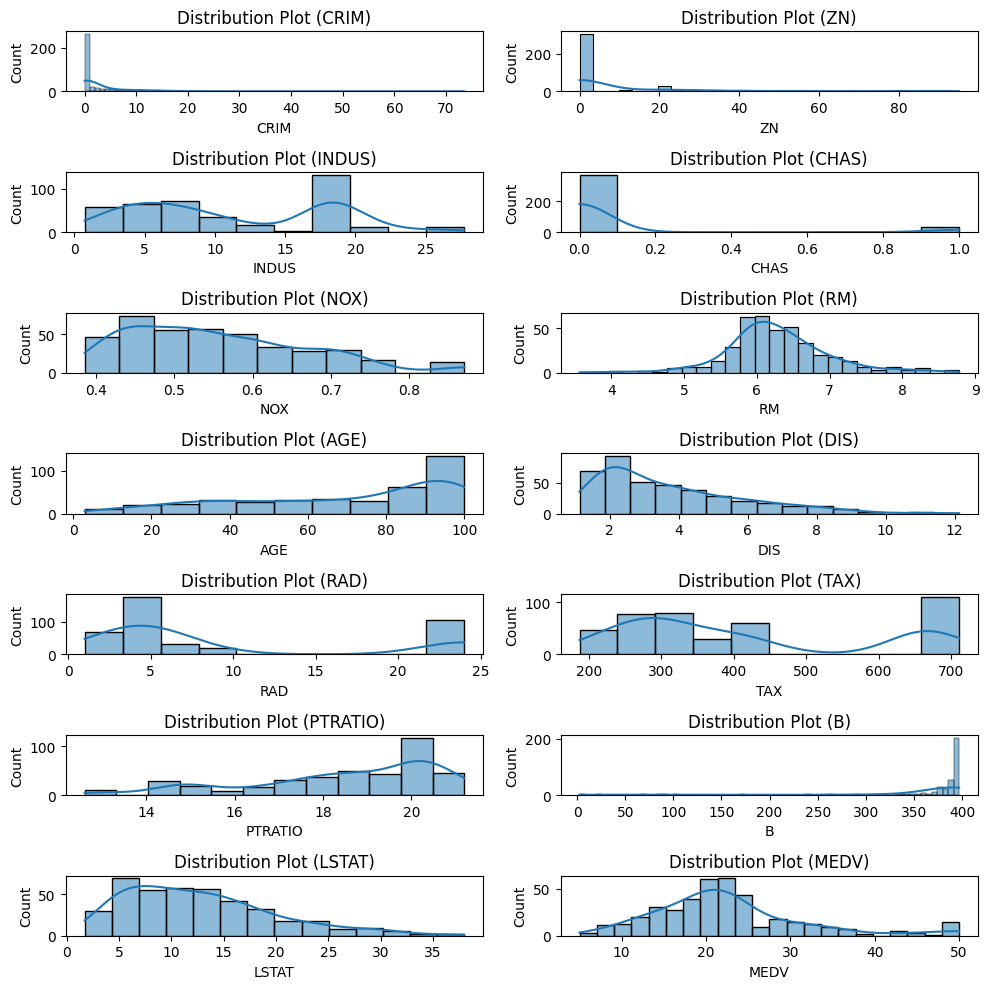

In [9]:
visualize_numvar(data_train, column_names, 'MEDV', 'dist')

> The distribution of the variables in the dataset appears to be relatively imbalanced for some variables.

## Box Plot

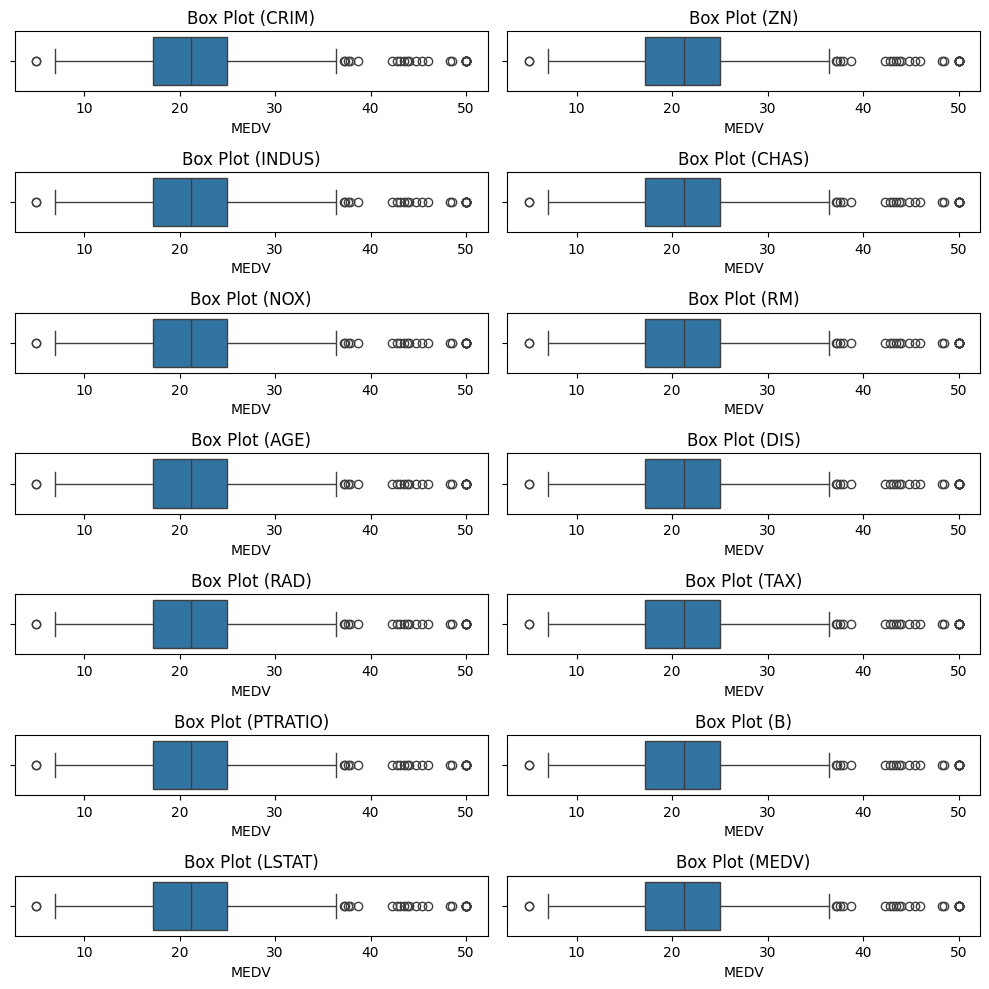

In [10]:
visualize_numvar(data_train, column_names, 'MEDV', 'box')

> Based on the graph above, it seems that there are outliers on most of variables in this dataset.

In [11]:
data_train = data_train[data_train['MEDV'] < 36]

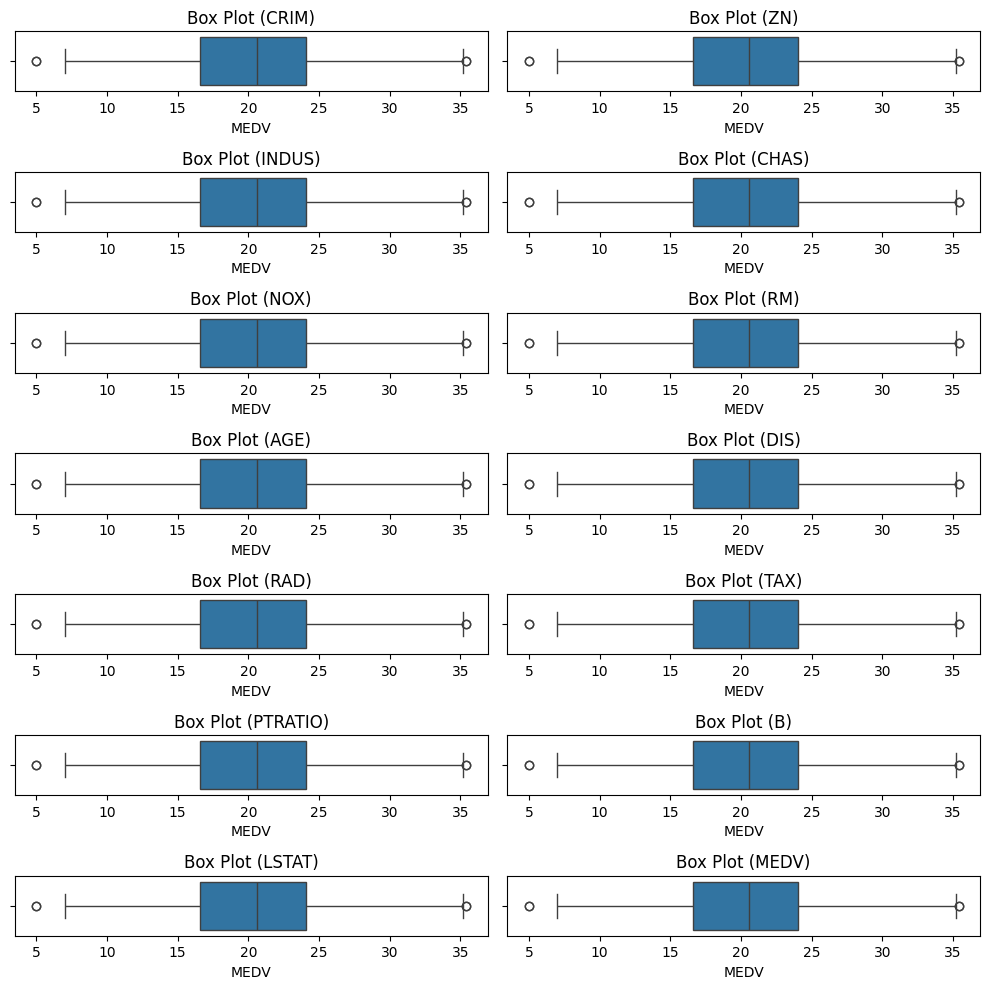

In [12]:
visualize_numvar(data_train, column_names, 'MEDV', 'box')

> Based on the graph above, it seems that there is much fewer outliers on most of variables in this dataset.

## Scatter Plot

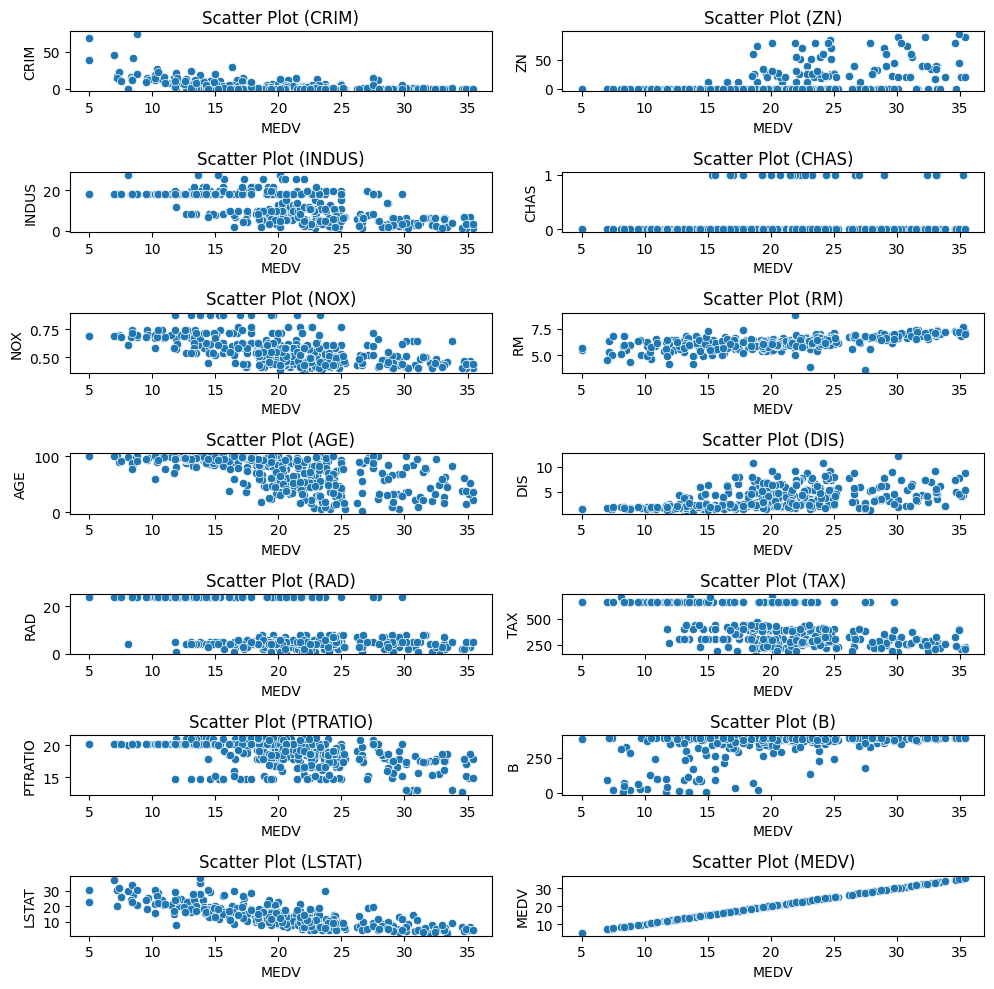

In [13]:
visualize_numvar(data_train, column_names, 'MEDV', 'scatter')

## Correlation Analysis

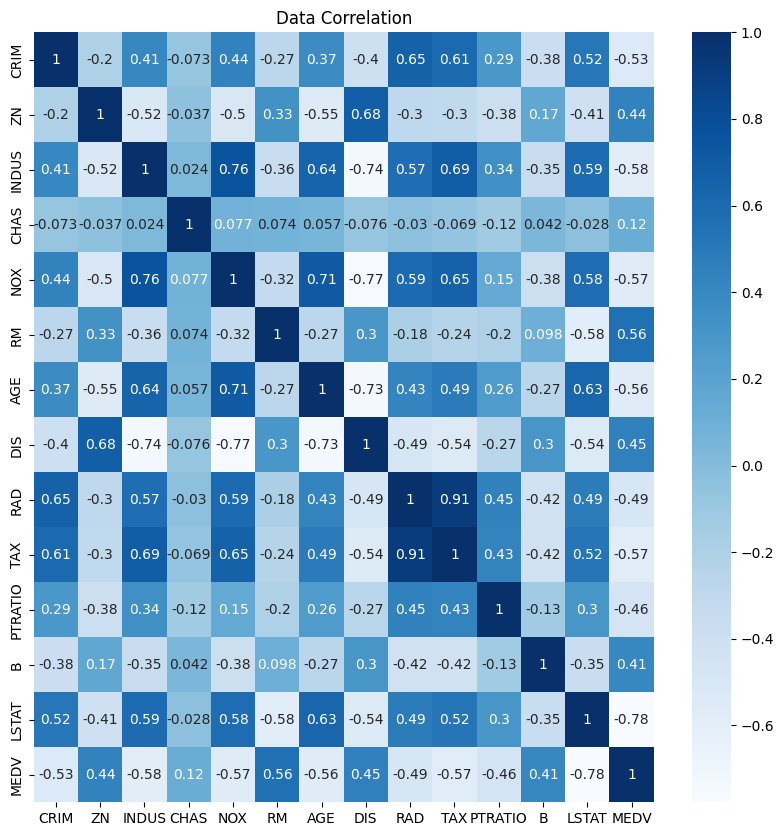

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_train.corr(), cmap='Blues', annot=True)
plt.title('Data Correlation')
plt.show()

> It's noteworthy that the correlation between the numerical independent variables and dependent variable ranges vary. The correlation between "MEDV" and all independent variables ranges from (absolute) 0.12 to 0.78, which indicate a weak to very strong relationship [1].

> Among all available independent variables, the "CHAS" (Charles River variable) has the weakest correlation with dependent variable in this dataset. This suggests that a property's proximity to the river does not significantly affect its value in the context of house prices. This might be because the river is not a popular recreational area, which is applied to the current reality.

> However, since one of the requirements in this case is to use only independent variables that have a strong correlation with the dependent variable in the dataset, then all those independent variables with a correlation of less than 0.5 (absolute) are removed.

In [15]:
columns_to_remove = ['ZN', 'CHAS', 'DIS', 'RAD', 'PTRATIO', 'B']
data_train = data_train.drop(columns=columns_to_remove)
data_test = data_test.drop(columns=columns_to_remove)

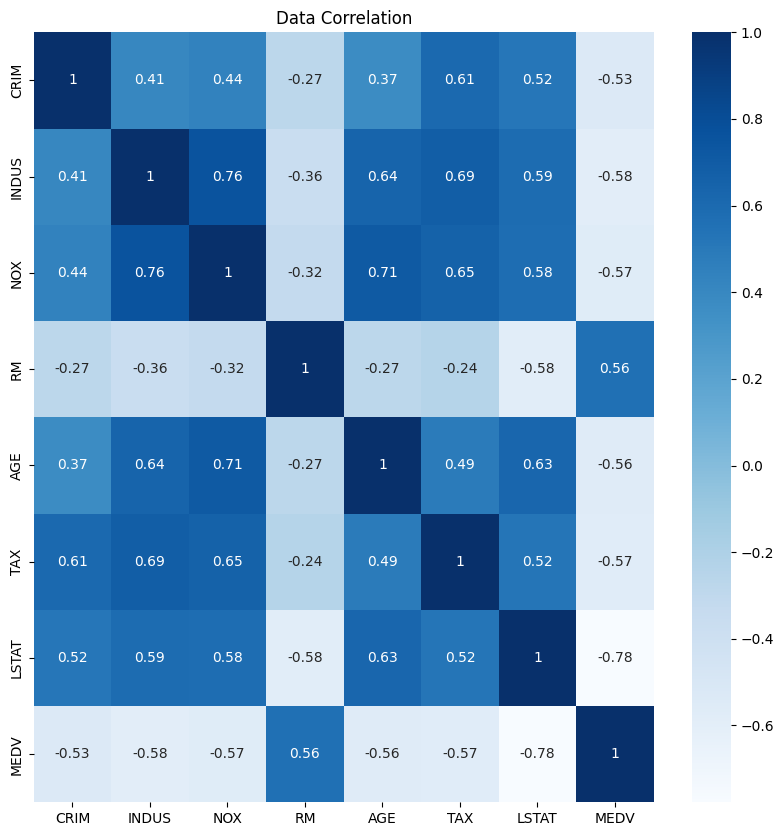

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_train.corr(), cmap='Blues', annot=True) 
plt.title('Data Correlation')
plt.show()

> Next, checking multicollinearity using Variance Inflation Factor (VIF).

In [17]:
def generate_VIF(data):
  vif_data = pd.DataFrame({
    'feature' : data.columns,
    'VIF' : [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
  })
  print(vif_data)

In [18]:
generate_VIF(data_train)

  feature        VIF
0    CRIM   2.170744
1   INDUS  12.250008
2     NOX  67.861029
3      RM  76.684166
4     AGE  18.513723
5     TAX  19.223785
6   LSTAT  11.324652
7    MEDV  32.816731


> The obtained Variance Inflation Factor (VIF) for the independent variables in the dataset indicates a potentially severe correlation. The variables with the highest VIF are "NOX" and "RM" with score exceeds 50, which are significantly higher than the general rule of thumb threshold of 10 [3]. This suggests signs of serious multicollinearity requiring correction. Therefore, based on these results, it can be concluded that while each variable brings some unique information to the model, the level of multicollinearity for certain variables is high enough to potentially distort the model significantly.

In [19]:
columns_to_remove = ['RM', 'NOX']
data_train = data_train.drop(columns=columns_to_remove)
data_test = data_test.drop(columns=columns_to_remove)

In [20]:
generate_VIF(data_train)

  feature        VIF
0    CRIM   2.167418
1   INDUS  10.329369
2     AGE  14.658636
3     TAX  15.595419
4   LSTAT   9.741814
5    MEDV   5.103305


> The obtained Variance Inflation Factor (VIF) for the independent variables in the dataset still indicates a potentially severe correlation. However, in real-world business scenarios, these variables indeed a crucial factor that can impact profitability. Hence, I decided to keep the rest despite its high VIF.

# Feature Transformation

In [21]:
scalar = StandardScaler()

In [22]:
data_train[data_train.columns.difference(['MEDV'])] = scalar.fit_transform(data_train.drop(columns='MEDV'))
data_train.head()

,CRIM,INDUS,AGE,TAX,LSTAT,MEDV
423,0.943656,0.554650,0.430513,1.412217,1.474737,13.4
82,-1.006897,-1.373662,-0.450641,-0.973935,-0.795232,24.8
55,-1.543152,-1.749117,-0.453591,-1.248983,-1.119514,35.4
411,0.943656,1.097786,1.309965,1.114128,1.474737,17.2
209,-0.162738,1.097786,-0.400499,1.383416,-0.818816,20.0


# Data Splitting

In [23]:
data_train, data_valid = split_dataset(data_train.drop(columns='MEDV'), data_train['MEDV'], 0.75, 1)

> Dividing the training data into training and validation sets using a 3:1 ratio.

# Model Building

In [24]:
class linear_regression:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    return np.dot(x, self.w) + self.b

  def update_w(self, x, y, y_predict):
    return np.dot((y_predict - y), x) / len(y) * 2

  def update_b(self, y, y_predict):
    return sum(y_predict - y) / len(y) * 2

  def loss_function(self, y, y_predict):
    return np.sum((y - y_predict)**2) / len(y)

  def fit(self, x, y, learn_rate, epochs):
    loss = []
    for i in range(epochs):
      y_predict = self.predict(x)
      self.b = self.b - learn_rate * self.update_b(y, y_predict)
      self.w = self.w - learn_rate * self.update_w(x, y, y_predict)
      loss.append(self.loss_function(y, y_predict))
    return loss

In [25]:
def loss_visualization(loss, learn_rate, epochs):
  for i in range(len(loss)):
    plt.plot(np.arange(1, epochs), loss[i][1:], label=learn_rate[i])
  plt.title('Number of Epochs vs Loss')
  plt.xlabel('Number of Epochs', size=10)
  plt.ylabel('Loss', size=10)
  plt.legend()

> Besides weights and bias, we also need to optimize the learning rate. In this case, we will try using several learning rates to see the most effective learning rates with this dataset.

In [26]:
losses, w, b = [], [], []
learn_rates = [0.005, 0.01, 0.05, 0.1, 0.3]
epochs = 5000

for i in range(len(learn_rates)):
  model = linear_regression(np.zeros(data_train.drop(columns='MEDV').shape[1]), 0)
  losses.append(model.fit(data_train.drop(columns='MEDV'), data_train['MEDV'], learn_rates[i], epochs))
  w.append(model.w)
  b.append(model.b)

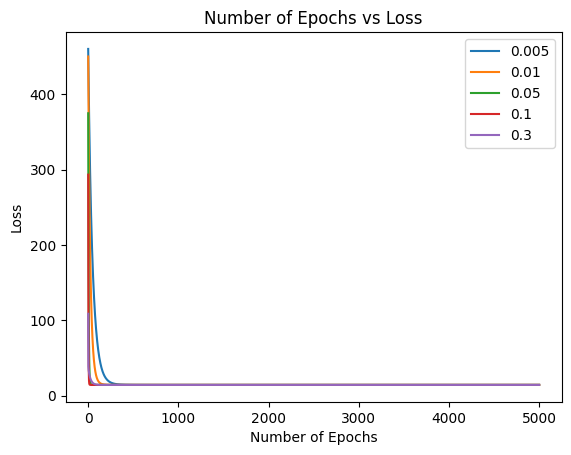

In [27]:
loss_visualization(losses, learn_rates, epochs)

In [28]:
loss = []
for i in range(len(learn_rates)):
  loss.append([learn_rates[i], losses[i][epochs - 2]])
loss = sorted(loss, key=lambda x:x[1])
print(f"Learning rate ({loss[0][0]}) produces smallest loss: {loss[0][1]}")

Learning rate (0.01) produces smallest loss: 14.105868698321517


> Based on the results above, it can be concluded that learning rate 0.01 is the most effective in minimizing the loss on this dataset (closest to 0). However, it is important to note that the loss score remains relatively high.

In [29]:
print(f"Weights: {w[1]}")
print(f"Bias: {b[1]}")

Weights: [-0.45390547 -0.12934883 -0.68583277 -3.75916266 -0.83675383]
Bias: 20.687753820122456


> This weights and bias will be used on the final model in the next part.

## Train The Final Model

In [30]:
loss = []
learn_rate = [0.01]
model_final = linear_regression(w[1], b[1])
loss.append(model.fit(data_train.drop(columns='MEDV'), data_train['MEDV'], learn_rates[0], epochs))

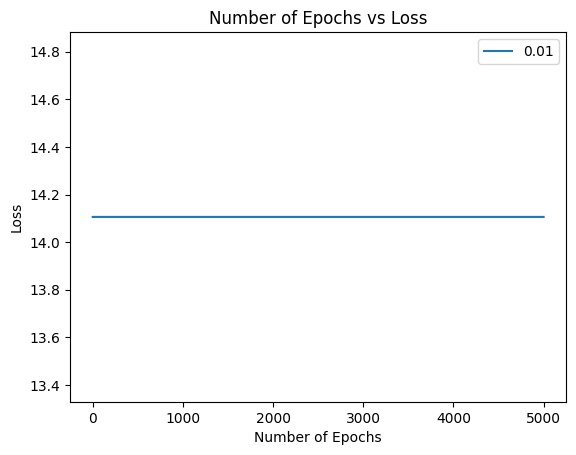

In [31]:
loss_visualization(loss, learn_rate, epochs)

> The loss score remains constant during the training of the final model, indicating that the model parameters have likely converged and further training does not significantly reduce the loss.

In [32]:
print(f"Weights: {model_final.w}")
print(f"Bias: {model_final.b}")

Weights: [-0.45390547 -0.12934883 -0.68583277 -3.75916266 -0.83675383]
Bias: 20.687753820122456


# Model Evaluation

In [33]:
data_valid['MEDV predict'] = model_final.predict(data_valid.drop(columns='MEDV'))
data_valid.head()

,CRIM,INDUS,AGE,TAX,LSTAT,MEDV,MEDV predict
462,0.943656,0.478101,0.380826,0.072976,1.474737,19.5,18.428076
378,0.943656,0.959268,2.515709,1.469818,1.474737,13.1,11.650710
344,-1.166006,-1.523115,-0.451408,-1.277784,-0.270486,31.2,26.753342
312,-0.264391,0.747846,-0.422362,-0.253913,-0.659624,19.4,22.507143
6,-0.563456,-0.119712,-0.444146,-0.151670,-0.618352,22.9,22.351166


In [34]:
print(f"Loss: {model_final.loss_function(data_valid['MEDV'], data_valid['MEDV predict']):.3f}")

Loss: 12.358


In [35]:
print(f"R2 Score: {r2_score(data_valid['MEDV'], data_valid['MEDV predict']):.3f}")

R2 Score: 0.651


> This model achieved a Mean Squared Error (MSE) score of 12.358. This high MSE indicates that there is a difference between the predicted and actual values. However, this model also achieved an R-squared (R²) score of 0.651. This suggests that approximately 65.1% of the variance in the dependent variable can be explained by the model’s independent variables [4].

> Hence, it can be concluded that this final model provides a reasonable baseline prediction. However, the high MSE score indicates that the predictions may not closely match the actual values.

## Predict using Test Dataset

In [36]:
data_test[data_test.columns.difference(['MEDV'])] = scalar.fit_transform(data_test.drop(columns='MEDV'))
data_test.head()

,CRIM,INDUS,AGE,TAX,LSTAT,MEDV
455,1.160137,0.722214,0.032908,0.813569,1.571824,14.1
142,1.380801,1.171924,-0.091694,2.031613,-0.020899,13.4
311,-0.062460,-0.400396,-0.311995,-0.889451,-0.620441,22.1
232,-0.614120,0.282498,-0.330722,-1.381434,-0.602273,41.7
290,-0.800491,-1.229861,-0.377755,-1.260891,-0.977744,28.5


In [37]:
data_test['MEDV predict'] = model_final.predict(data_test.drop(columns='MEDV'))
data_test.head()

,CRIM,INDUS,AGE,TAX,LSTAT,MEDV,MEDV predict
455,1.160137,0.722214,0.032908,0.813569,1.571824,14.1,15.671608
142,1.380801,1.171924,-0.091694,2.031613,-0.020899,13.4,12.352624
311,-0.062460,-0.400396,-0.311995,-0.889451,-0.620441,22.1,24.844618
232,-0.614120,0.282498,-0.330722,-1.381434,-0.602273,41.7,26.853775
290,-0.800491,-1.229861,-0.377755,-1.260891,-0.977744,28.5,27.027285


In [38]:
print(f"Loss: {model_final.loss_function(data_test['MEDV'], data_test['MEDV predict']):.3f}")

Loss: 50.446


In [39]:
print(f"R2 Score: {r2_score(data_test['MEDV'], data_test['MEDV predict']):.3f}")

R2 Score: 0.464


> This model achieved a Mean Squared Error (MSE) score of 50.446. This high MSE indicates that there is a significant difference between the predicted and actual values. However, this model also achieved an R-squared (R²) score of 0.464. This suggests that approximately 46.4% of the variance in the dependent variable can be explained by the model’s independent variables [4].

> Hence, it can be concluded that this final model provides a reasonable baseline prediction. However, the high MSE score indicates that the predictions may not closely match the actual values.

> In conclusion, the model has shown a high level of performance in both the validation and testing phases in terms of R-squared (R²). Despite the high MSE scores, the strong R² scores indicate that the model has a good fit to the data. Therefore, while the model’s predictions may not closely align with the actual values due to the high MSE, its high R² scores indicate that it can still be a useful tool for making further predictions.

# Visualize

In [40]:
data = pd.concat([data_valid, data_test])

In [41]:
def visualize_final(data, title, xlabel, ylabel):
  xl = np.array([min(min(data[xlabel]), min(data[ylabel])), max(max(data[xlabel]), max(data[ylabel]))])
  plt.plot(xl, xl, color = 'black', linestyle = 'dashed')
  plt.scatter(data[xlabel], data[ylabel])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

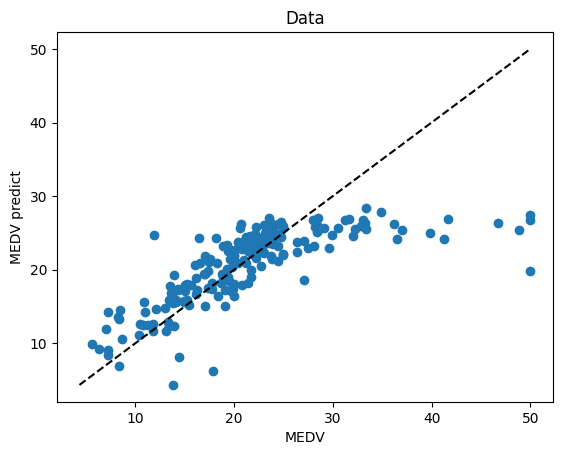

In [42]:
visualize_final(data, 'Data', 'MEDV', 'MEDV predict')